FinanceDataReader는 금융용 금융 데이터 리더(크롤러)입니다.
pandas-datareader를 보완한 라이브러리이다.
주요 기능은 다음과 같습니다.

KRX 종목코드: 'KRX', 'KOSPI', 'KODAQ', 'KONEX'
글로벌 증권 종목: 'NASDAQ', 'NYSE', 'AMEX' 및 'S&P500', 'SSE'(상해), 'SZSE'(심천), 'HKEX'(홍콩), 'TSE'(도오카)
KRX 상장폐지: 'KRX-DELISTING'(상장폐지종목), 'KRX-ADMINISTRATIVE'(관리종목)
ETF 기호 목록(여러 국가용): 'KR', 'US', 'JP'
주가(KRX) : '005930'(삼성), '091990'(셀트리온헬스케어) ...
주가(Word wide) : 'AAPL', 'AMZN', 'GOOG' ... (거래소(시장) 및 기호 지정 가능)
지수: 'KS11'(코스피지수), 'KQ11'(코스닥지수), 'DJI'(다우존스지수), 'IXIC'(나스닥지수), 'US500'(S&P 500지수) ...
거래소: 'USD/KRX', 'USD/EUR', 'CNY/KRW' ... (조합 화폐 율표 데이터 날짜별)
암호화폐 시세 데이터 : 'BTC/USD'(비트파이넥스), 'BTC/KRW'(빗썸).

프롬프트를 열어 pip install finance-datareader 를 칩니다.
import FinanceDataReader as fdr로 라이브러리를 가져옵니다.


In [1]:
import FinanceDataReader as fdr
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import platform
system_name = platform.system()
if system_name == 'Windows':
# Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
# Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")
fdr.__version__
df_krx = fdr.StockListing('KRX')
df_krx.shape   #한국 거래소 상장종목 전체가 7207개가 있고, 각 컬럼들은 10개를 가지는것을 알 수 있다.
df_krx.columns #KRX (한국 거새로 상장종목)의 보유 컬럼들을 체크하기 위함이다. 이를 통하여 Symbol, Market, Name, Sector, Industry, ListingDate,
#SettleMonth, Representative, HomePage, Region을 가지는것을 알 수 있다.
df_krx.head()
print(df_krx.shape)
nsi_df = pd.read_csv('data/NSI.csv', encoding='cp949')
cols = ['year', 'month', 'day']
nsi_df['combine'] = pd.to_datetime(nsi_df[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1))

ModuleNotFoundError: ignored

찾으실 주식의 이름을 넣어주세요두산중공업
어느 해 부터 찾을거?2021


C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82104\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


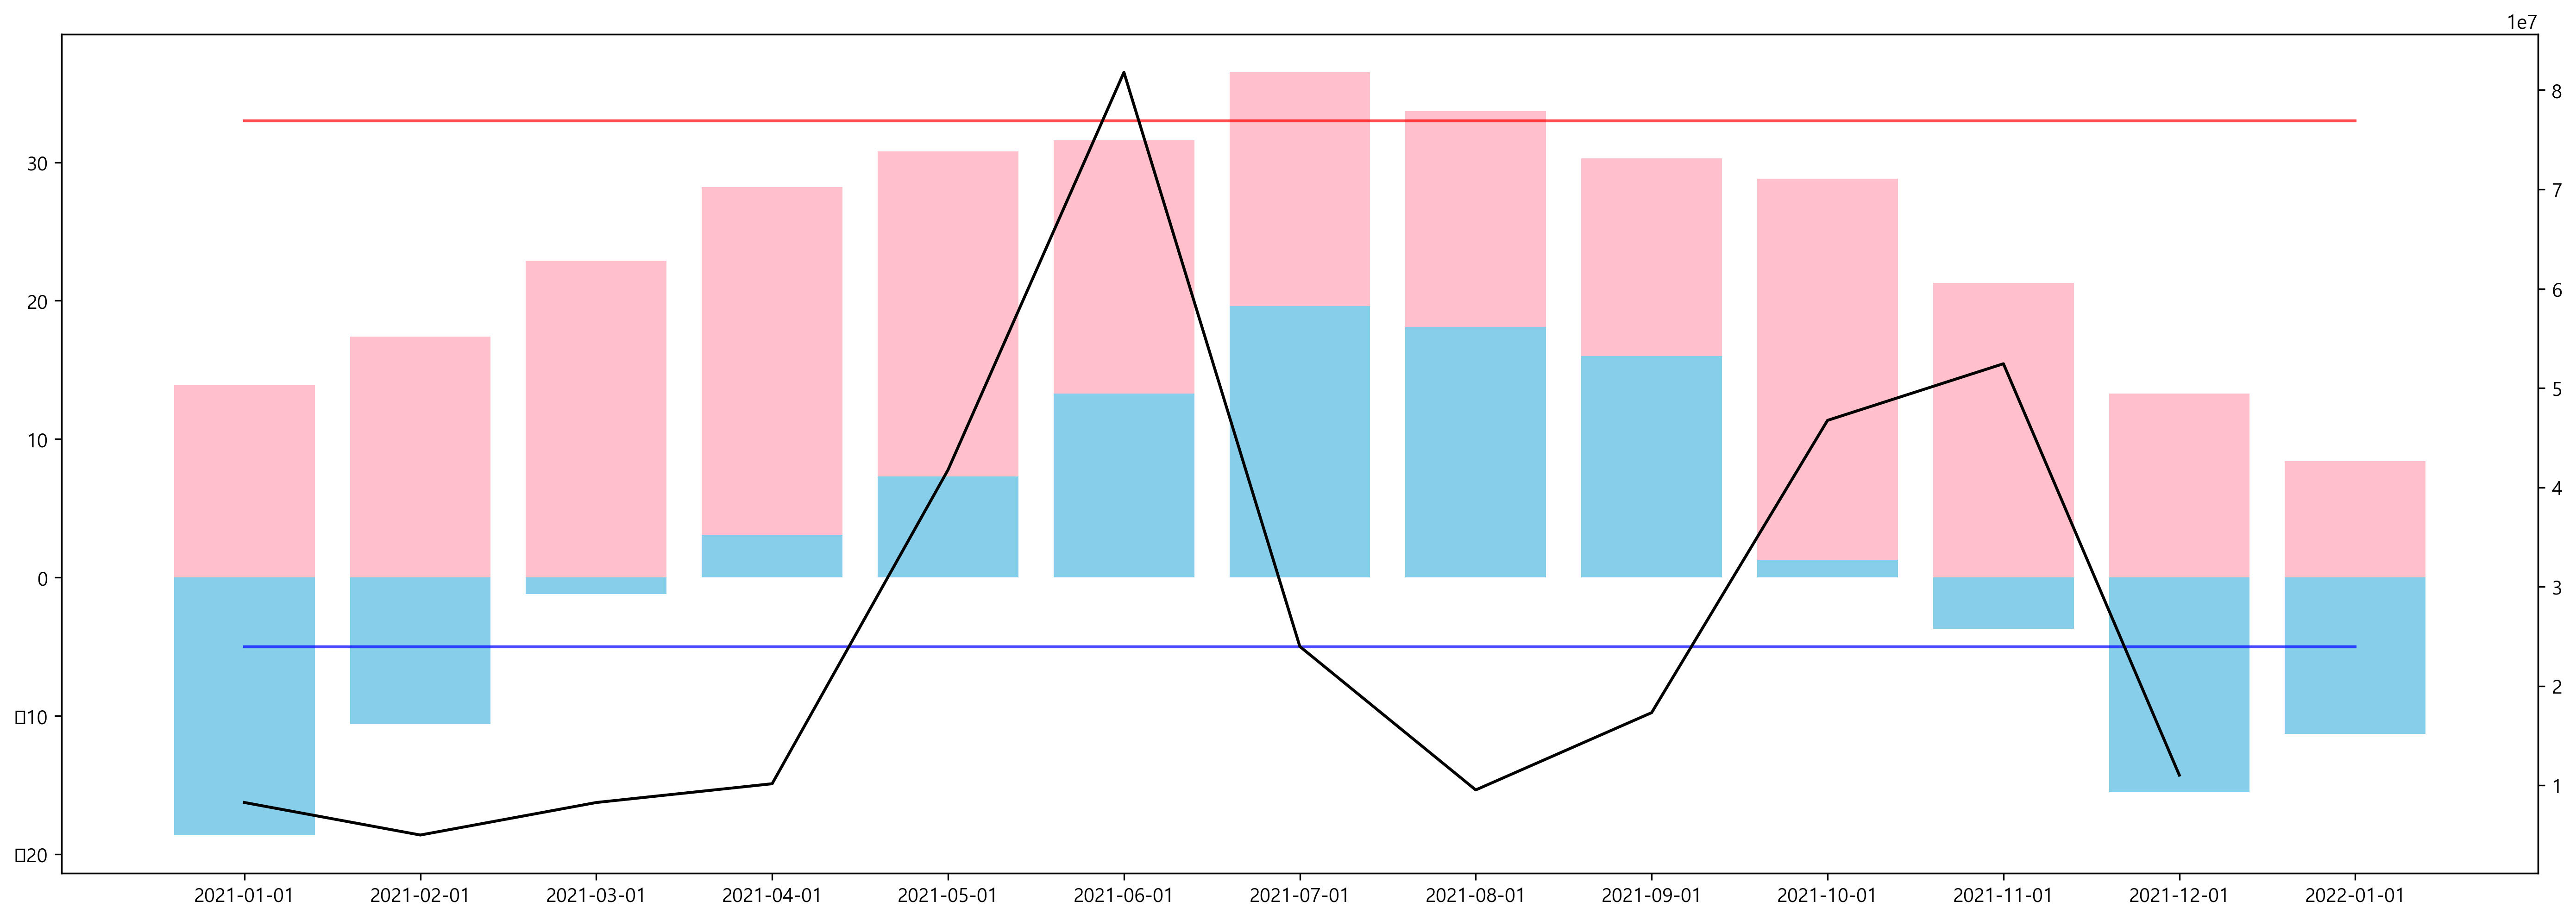

In [ ]:
def code_to_name():
    Symbol_name=input("찾으실 주식의 이름을 넣어주세요")
    
    return str(df_krx[df_krx['Name']== Symbol_name]['Symbol'].values[0])


df_weather = pd.read_csv("data/weather.csv", encoding ='cp949')


# fig, ax1 = plt.subplots()
# ax1.bar(df_weather['일시'][72:],df_weather['최고기온(℃)'][72:], color = 'r')
# ax2 = ax1.twinx()

# ax2.plot(df_weather['일시'][72:],[33]*len(df_weather['일시'][72:]), color ='r', alpha =0.2)
# plt.show()
df_list =[]
com_list =['한화솔루션', '두산중공업', '효성중공업', '현대에너지솔루션']
df = fdr.DataReader(code_to_name(),2022)
df = df.reset_index()
df

year =int(input('어느 해 부터 찾을거?'))
vol_list = []
for i in range(year,2022):
    df_year=df.reset_index(drop = True)[df.reset_index()['Date'].dt.year==i]
    for j in range(1,13):
        vol_list.append(df_year[df_year['Date'].dt.month ==j]['Volume'].max())




fig, ax1 = plt.subplots(figsize = (23,8),dpi=300)

ax1.bar(df_weather['일시'][(year-2012)*12:],df_weather['최고기온(℃)'][(year-2012)*12:], color = 'pink')
ax1.bar(df_weather['일시'][(year-2012)*12:],df_weather['최저기온(℃)'][(year-2012)*12:], color = 'skyblue')
ax1.plot(df_weather['일시'][(year-2012)*12:],[33]*len(df_weather['일시'][(year-2012)*12:]), color ='r', alpha =0.7)
ax1.plot(df_weather['일시'][(year-2012)*12:],[-5]*len(df_weather['일시'][(year-2012)*12:]), color = 'b', alpha =0.7)

ax2 = ax1.twinx()

ax2.plot(df_weather['일시'][(year-2012)*12:-1],vol_list, color='k')
plt.show()

In [ ]:
start_date = input('시작일(yyyy-mm-dd): ')

start_yy = int(start_date[:4])
start_mm = int(start_date[5:7])
start_dd = int(start_date[8:])

df1 = nsi_df[nsi_df['year']==start_yy] 
df2 = df1[df1['month']==start_mm]
df3 = df2[df2['day']==start_dd]

start_index = df3.index.values[0]

#종료일 입력 & 인덱스 반환
end_date = input('종료일(yyyy-mm-dd): ')

end_yy = int(end_date[:4])
end_mm = int(end_date[5:7])
end_dd = int(end_date[8:])

df4 = nsi_df[nsi_df['year']==end_yy] 
df5 = df4[df4['month']==end_mm]
df6 = df5[df5['day']==end_dd]

end_index = df6.index.values[0]

#start~end nsi df 잘라내기
target_nsi = nsi_df.iloc[start_index : end_index+1]
target_nsi.head()

시작일(yyyy-mm-dd): 2020-01-01
종료일(yyyy-mm-dd): 2022-01-01


,year,month,day,NSI,combine
5478,2020,1,1,112.02,2020-01-01
5479,2020,1,2,111.44,2020-01-02
5480,2020,1,3,115.05,2020-01-03
5481,2020,1,4,117.75,2020-01-04
5482,2020,1,5,118.93,2020-01-05


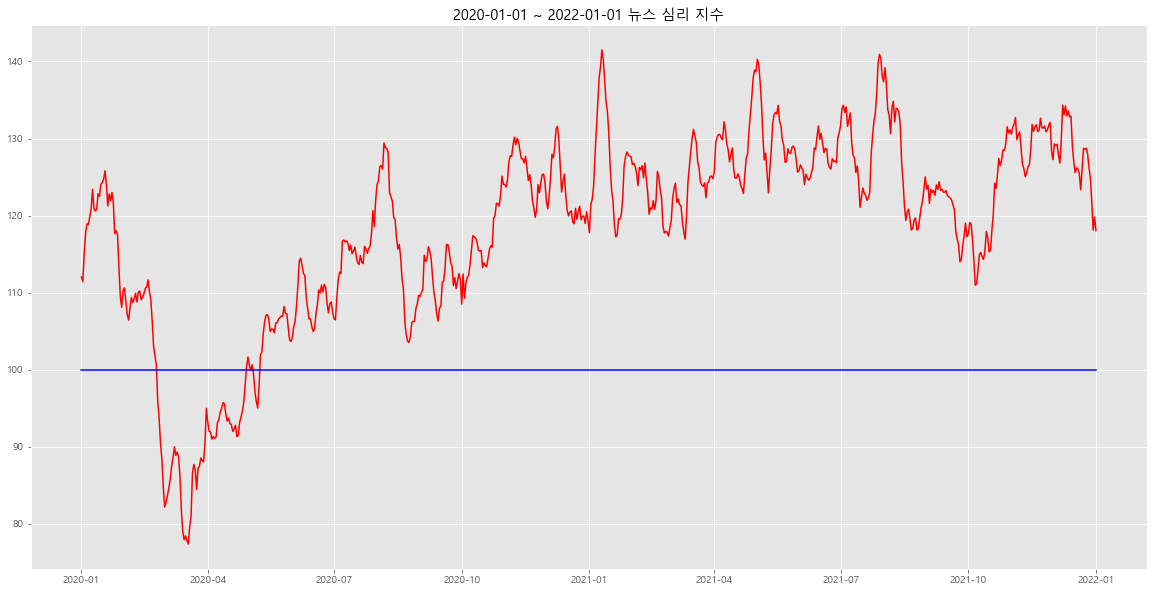

In [ ]:
#100선
a = pd.date_range(start_date, end_date)
b = [100] *len(a)

#start~end nsi 그래프 표현
def nsi_graph() :
    plt.style.use('ggplot')
    plt.rc('font', family='Malgun Gothic')
    plt.figure(figsize=(20,10))
    plt.title(start_date + ' ~ ' + end_date + ' 뉴스 심리 지수')
    plt.plot(a, target_nsi['NSI'], color='red')
    plt.plot(a, b, color='blue')
    plt.show()

nsi_graph()

NSI지수(뉴스 심리 지수)란 인터넷 경제뉴스 데이터를 문장 단위로 감정분석을 진행하여 지수화 한 것
1000을 초과하면 긍정문장이, 100 미만이면 부정문장이 더 많음을 의미

찾으실 주식의 이름을 넣어주세요두산중공업


C:\Users\82104\AppData\Local\Temp/ipykernel_12324/1344688613.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_stock['Change'] = target_stock['Change'] * 100
C:\Users\82104\AppData\Local\Temp/ipykernel_12324/1344688613.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_stock['Cum_Change'] = target_stock['Change'].cumsum()


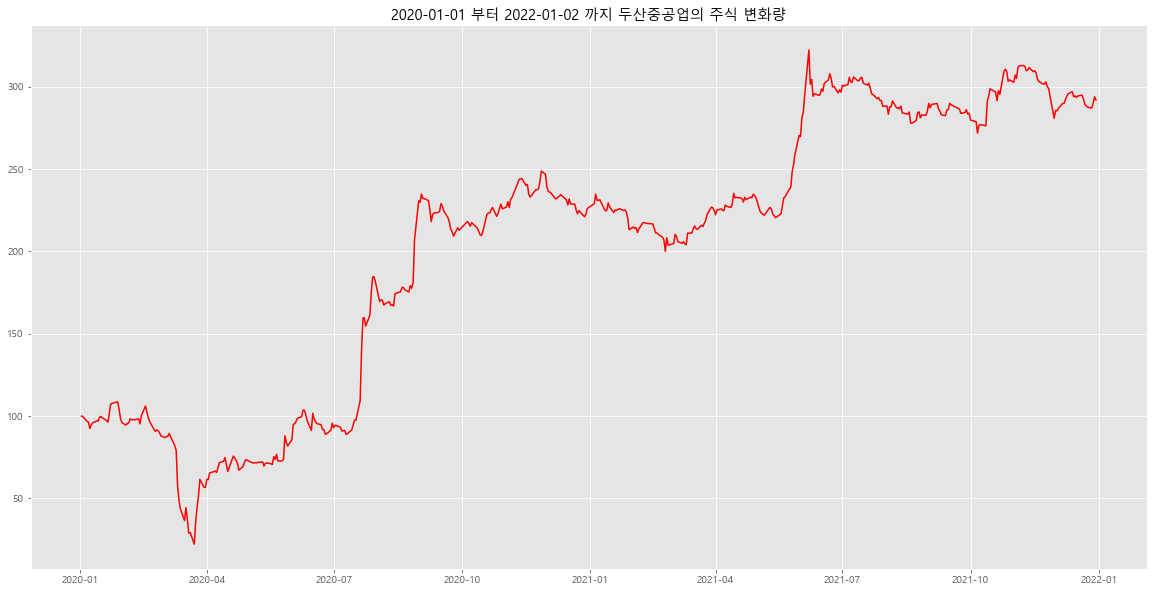

In [ ]:
#관심주의 연간 그래프
Symbol_name=input("찾으실 주식의 이름을 넣어주세요")
Symbol_code= 0
Symbol_code= (df_krx[df_krx['Name']== Symbol_name]['Symbol'].values)

df= fdr.DataReader(Symbol_code[0])

end_date = datetime.date(end_yy, end_mm, end_dd)
end_date = end_date + datetime.timedelta(days = 1)

#관심주의 주식 데이터 프레임 생성
target_stock = df.loc[start_date : end_date]
target_stock['Change'] = target_stock['Change'] * 100
target_stock.iloc[0] = 100
target_stock['Cum_Change'] = target_stock['Change'].cumsum()

#start~end stock 그래프 표현
def stock_graph() :
    plt.style.use('ggplot')
    plt.rc('font', family='Malgun Gothic')
    plt.figure(figsize=(20,10))
    plt.title('{0} 부터 {1} 까지 {2}의 주식 변화량'.format(start_date, end_date, Symbol_name))
    plt.plot(target_stock['Cum_Change'], color='red')
    plt.show()

stock_graph()

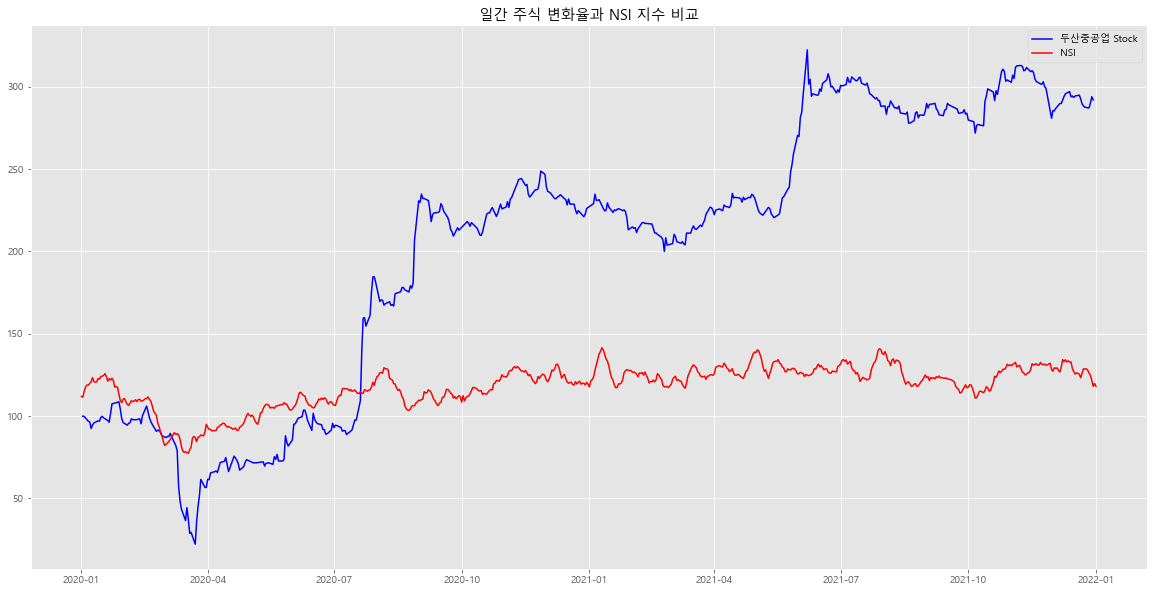

In [ ]:
def total_graph() :
    plt.style.use('ggplot')
    plt.rc('font', family='Malgun Gothic')
    plt.figure(figsize=(20,10))
    plt.title('일간 주식 변화율과 NSI 지수 비교')
    
    plt.plot(target_stock['Cum_Change'], color='blue', label=Symbol_name +' Stock')
    plt.plot(a, target_nsi['NSI'], color='red', label='NSI')
    plt.legend()
    plt.show()

total_graph()

In [ ]:
def many_graph() :
    plt.style.use('ggplot')
    plt.rc('font', family='Malgun Gothic')
    plt.figure(figsize=(20,10))
    plt.title('일간 주식 변화율과 NSI 지수 비교')
    
    plt.plot(target_stock1['Cum_Change'], color='blue', label='삼성전자 Stock')
    plt.plot(target_stock2['Cum_Change'], color='yellow', label='셀트리온 Stock')
    plt.plot(target_stock3['Cum_Change'], color='green', label='SM Stock')
    plt.plot(a, target_nsi['NSI'], color='red', label='NSI')
    plt.legend()
    plt.show()

C:\Users\82104\AppData\Local\Temp/ipykernel_12324/718614985.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_stock1['Change'] = target_stock1['Change'] * 100
C:\Users\82104\AppData\Local\Temp/ipykernel_12324/718614985.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_stock1['Cum_Change'] = target_stock1['Change'].cumsum()
C:\Users\82104\AppData\Local\Temp/ipykernel_12324/718614985.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

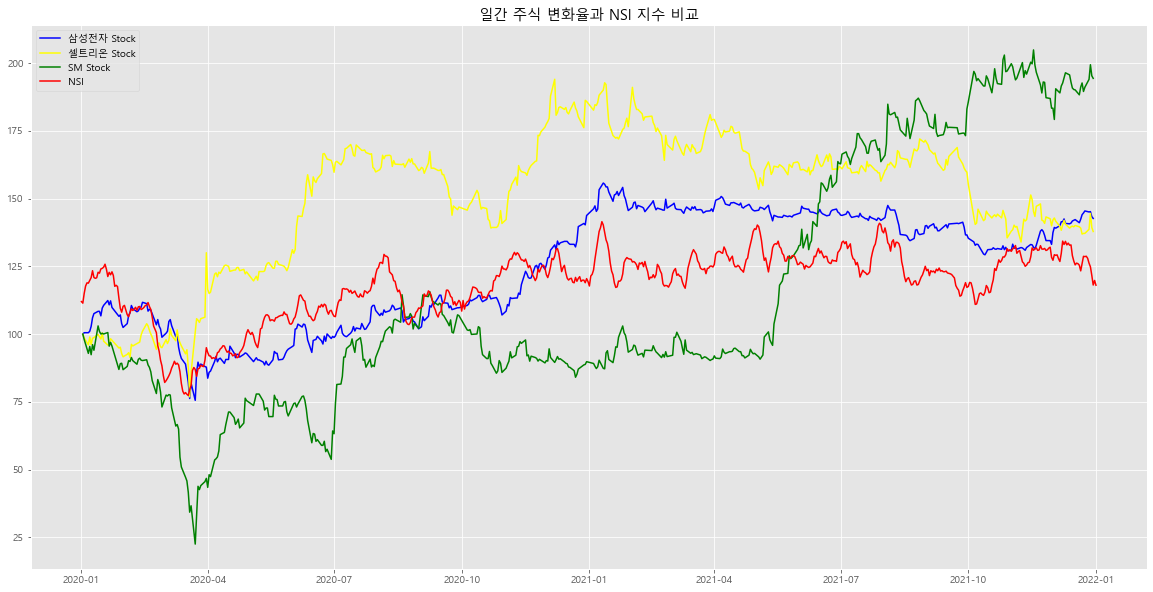

In [ ]:
#위에 한 거 삼성전자 한번더
#관심주의 연간 그래프
Symbol_name= '삼성전자'
Symbol_code= 0
Symbol_code= (df_krx[df_krx['Name']== Symbol_name]['Symbol'].values)
df= fdr.DataReader(Symbol_code[0])

#관심주의 주식 데이터 프레임 생성
target_stock1 = df.loc[start_date : end_date]
target_stock1['Change'] = target_stock1['Change'] * 100
target_stock1.iloc[0] = 100
target_stock1['Cum_Change'] = target_stock1['Change'].cumsum()

#위에 한 거 셀트리온 한번더
#관심주의 연간 그래프
Symbol_name= '셀트리온'
Symbol_code= 0
Symbol_code= (df_krx[df_krx['Name']== Symbol_name]['Symbol'].values)
df= fdr.DataReader(Symbol_code[0])

#관심주의 주식 데이터 프레임 생성
target_stock2 = df.loc[start_date : end_date]
target_stock2['Change'] = target_stock2['Change'] * 100
target_stock2.iloc[0] = 100
target_stock2['Cum_Change'] = target_stock2['Change'].cumsum()

#위에 한 거 에스엠 한번더
#관심주의 연간 그래프
Symbol_name= '에스엠'
Symbol_code= 0
Symbol_code= (df_krx[df_krx['Name']== Symbol_name]['Symbol'].values)
df= fdr.DataReader(Symbol_code[0])

#관심주의 주식 데이터 프레임 생성
target_stock3 = df.loc[start_date : end_date]
target_stock3['Change'] = target_stock3['Change'] * 100
target_stock3.iloc[0] = 100
target_stock3['Cum_Change'] = target_stock3['Change'].cumsum()

many_graph()

푸른색 NSI지수와 다른 주식 과 어느정도 상관관계가 있음을 확인할 수 있음
코로나 확산세가 본격화된 2020.3월을 기준으로
일반 기업인 LG전자(붉은색)는 평이하게 따라가는 편
백신 관련주인 셀트리온(노란색)은 코로나가 지속될수록 계속 상향세
SM엔터테인먼트(초록색)는 공연이나 대면행사의 위축으로 인해 다른 주식에 비해 오르는 폭이 적음

Symbol은 각 종목들의 분류 코드이다.
Market은 코스닥인지, KOSPI인지, KONEX인지 거래소 종목 종류를 나타낸다.
Name 해당 주식의 이름이며, Sector는 해당 주식이 어느 사업 분야인지를 나타낸다. ex)철강업, 제조업 등등
Industry는 해당 기업이 어디쪽 사업을 하고 있는지 나타낸다.
ListingDate는 상장일자 
SettleMonth?
Representative는 대표이사이다.
HomePage는 회사의 홈페이지며
Region는 회사 지역이다.
코스피지수란?

dfr라이브러리에서 원하는 주식의 데이터를 가져오기 위해서 해당 주식의 종목코드를 불러서 가져와야한다.
하지만 우리는 주식의 이름을 알지 주식종목의 코드를 아는것이 아니다.
따라서, 편하게 불러오기 위해서 이름을 넣었을시, 해당 종목 주식의 이름과 해당 ['Name']컬럼에서 입력한 Symbol_name이 같을경우
해당 Symbol의values(종목 코드)를 Symbol_code가 가집니다.
해당 Symbol_code를 가지고 불러온 데이터프레임을 df에 저장합니다.
해당 주식의 정보를 자동으로 처음부터 끝까지 불러오기 위해서
start_year(해당 주식 처음 시작일), Start_month(해당 주식 시작 월),start_day(해당 주식 시작 일).
end_day(해당 주식 종료일. 상장폐지가 아닌이상 해당 주식 종료일은 현재까지 쭉 다 가져와야함.)

start_year는 사용자의 입력 없이 자동으로 가져오기 위해서 해당 데이터프레임의 인덱스는 date스탬프형 이기때문에 날짜를 담고 있음 .
따라서 해당 데이터프레임의 인덱스[0]번째는 자동으로 해당 주식의 데이터가 생긴 처음 날짜일것임.
그래서, 해당 인덱스의[0][:4]를 한다면 해당 년도를 자동으로 들고 올 수 있음.
반대로, end_year는 데이터프레임의 인덱스[-1]번째는 해당 주식의 마지막 데이터의 날짜일 것임. 
set_year, set_month, set_day는 시작 년도의 str형을 위해서 설정함.
set_년,달,일을 통하여 다른 데이터프레임의 컬럼 정보를 참조할때, 인덱스를 맞춰주기 위하여 설정

코스피지수가 담겨있는 데이터프레임에서 Date를 현재 주식의 Date와 맞추기 위해서
해당 주식의 처음 담겨있는 시작 날짜와 맞추어야 하는데 
('KS11','2012-03-12')이라고 친다면, 사용자의 입력 없이 이것을 하도록 하기 위해서
search_info를 통하여 해당 주식의 str(set_year)+"-"+str(set_month)+"-"+str(set_day)값을 주어
2012-03-12값을 담도록 하여 지정하도록함.
참고로 주식은 월~금요일만 거래하므로, 토,일요일은 상관없음
따라서, 요일리스트는 월~금으로 미리 만들어둠.
그리고 인덱스는 datetime형입니다. 인덱스는 가상의 row라서, 인덱스에서 조건을 걸어 해당 인덱스만 골라서 보여주는것이 어려워보임
따라서 인덱스의 정보를 Column으로 만들기로 함.
df['Date'] = df.index 를 통하여 Date컬럼을 만들어 주었음.
for문을 통하여 해당 주식의 정보를 몇년도 몇월달 데이터를 일별로 자동으로 보여주기로 하였음.
for i in range(0, (end_year - start_year)+1):를 통하여 년수길이만큼 for문이 돌고 해당 년수에 해당하는 데이터프레임을 가지도록 하였음
해당 년수값을 가지는 데이터 프레임에서
for i in range(0, (end_month - start_month)+1):를 통하여 해당 주식이 가지고 있는 달 길이 만큼 for문을 돌리도록 함.
해당 년값을 가지는 데이터 프레임에서 df_year[df_year['Date'].dt.month == (start_month+i)를 통하여 해당 달의 데이터만을 표현하도록 하였음. 

여기서,day_index, day_open, day_high, day_low, day_close, day_volume, day_volume_avg, day_volume_per 에 값들은
day_index는 해당 달이 가지는 요일들의 숫자, day_open는 해당 요일별 장전 가격, 상한가, 하한가, 장마감후 가격, 거래량, 거래량평균(1달치평균), day_volume_per는 볼륨의 숫자가 너무 높아 (해당요일 거래량/달의 평균 거래량)을 통하여 0.1~10정도의 값 안으로 보여주기 위함.

찾으실 주식의 이름을 넣어주세요롯데렌탈
해당 주식의 코드는['089860']입니다.
2021
2022
종목코드가 089860인 주식이름 롯데렌탈의 주식데이터가 2021에서 2022까지 존재합니다.

해당 종목의 2021년도부터 2022년도까지의 장마감후시세를 그래프로 나타냅니다.

8월의 데이터


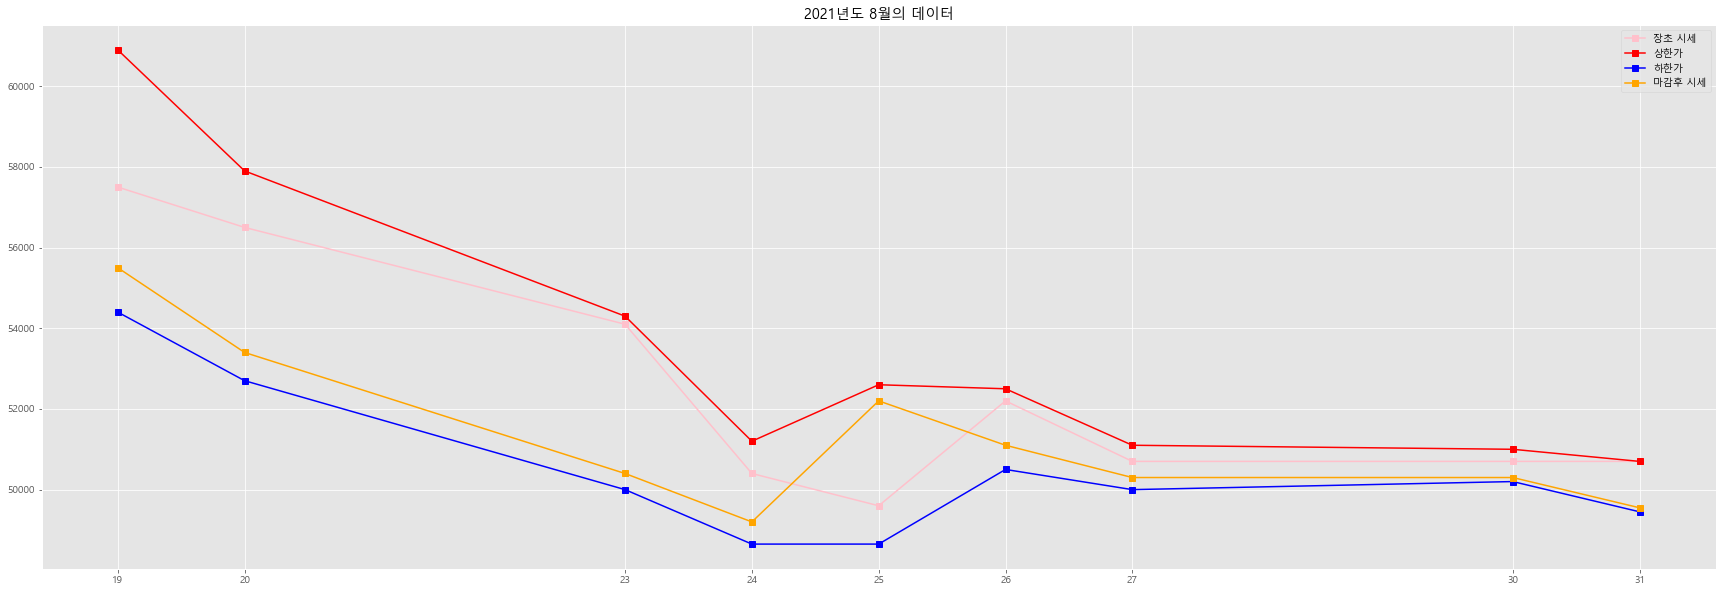

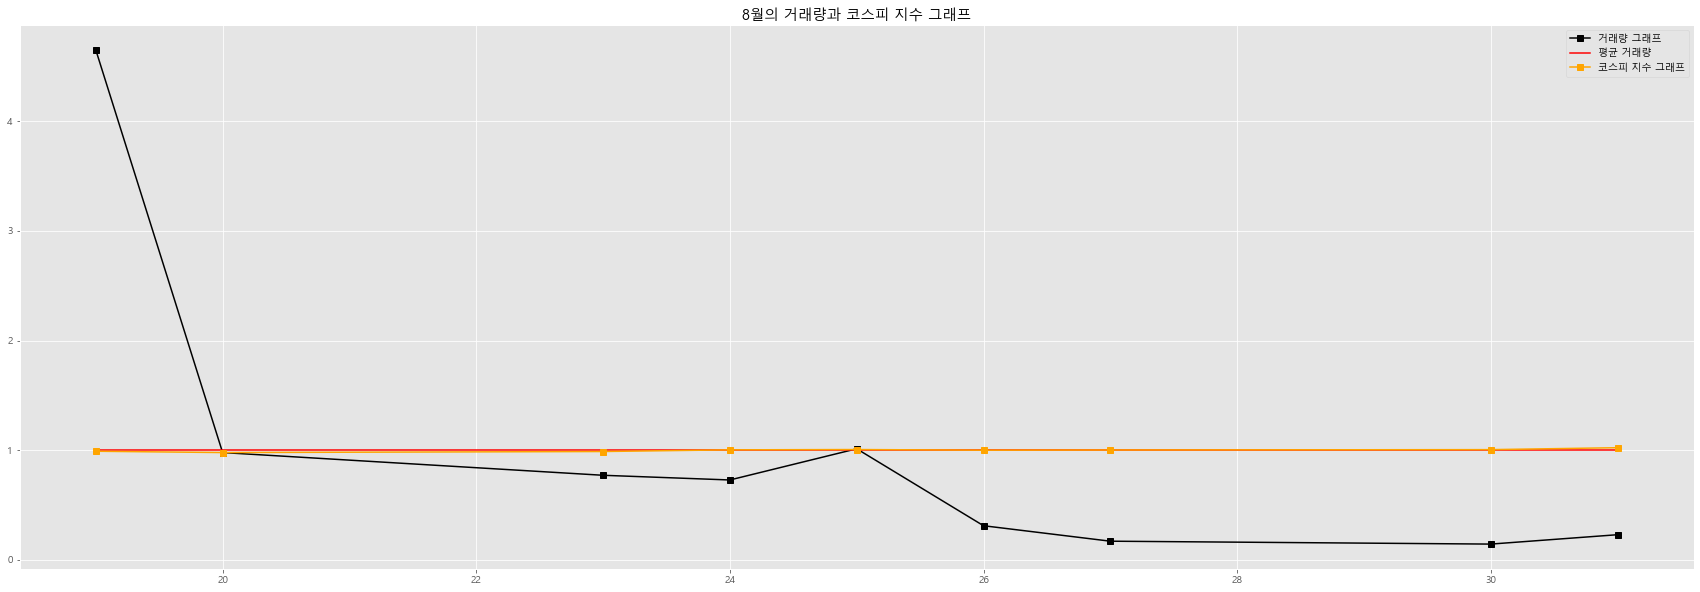

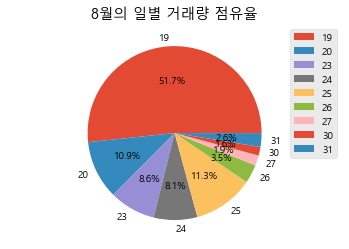

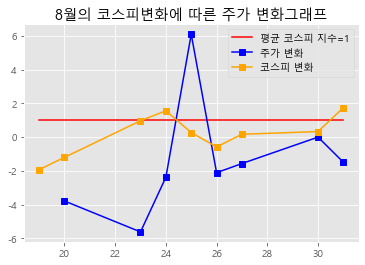

9월의 데이터


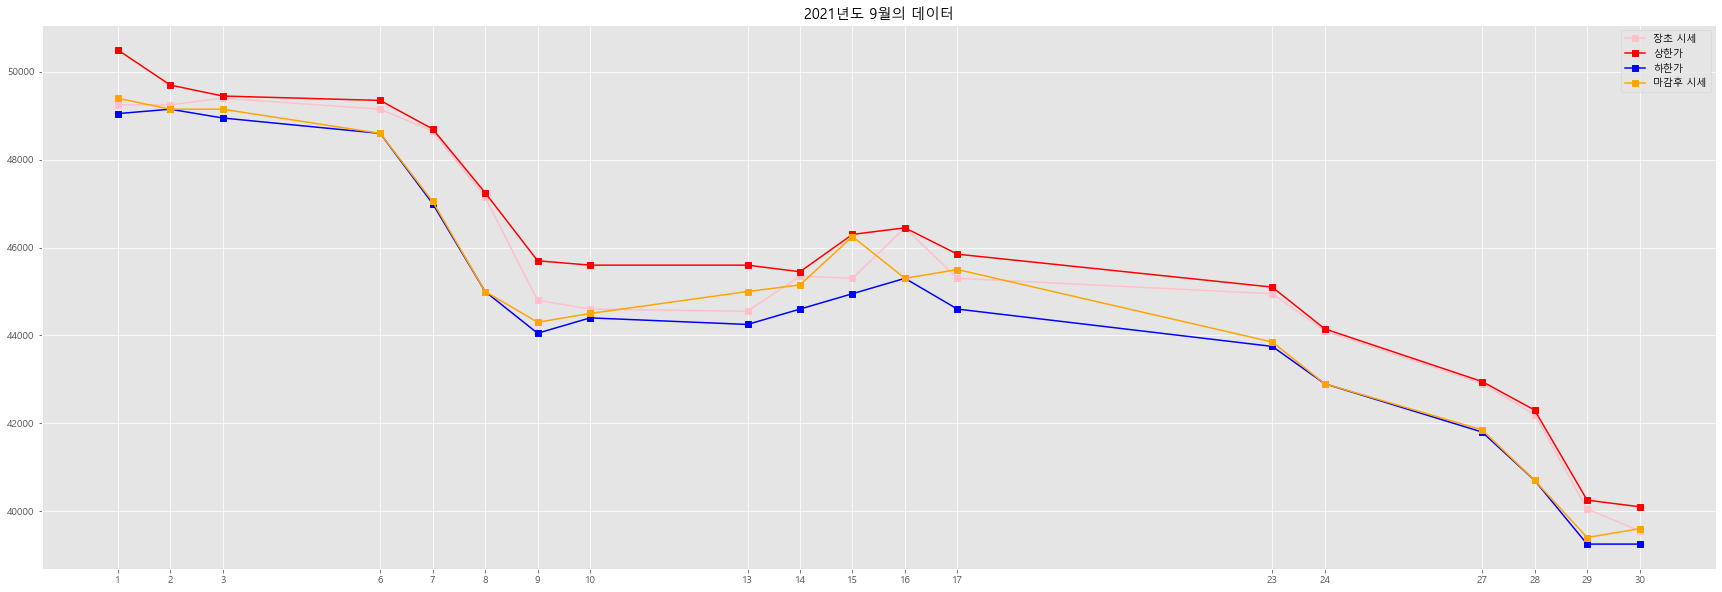

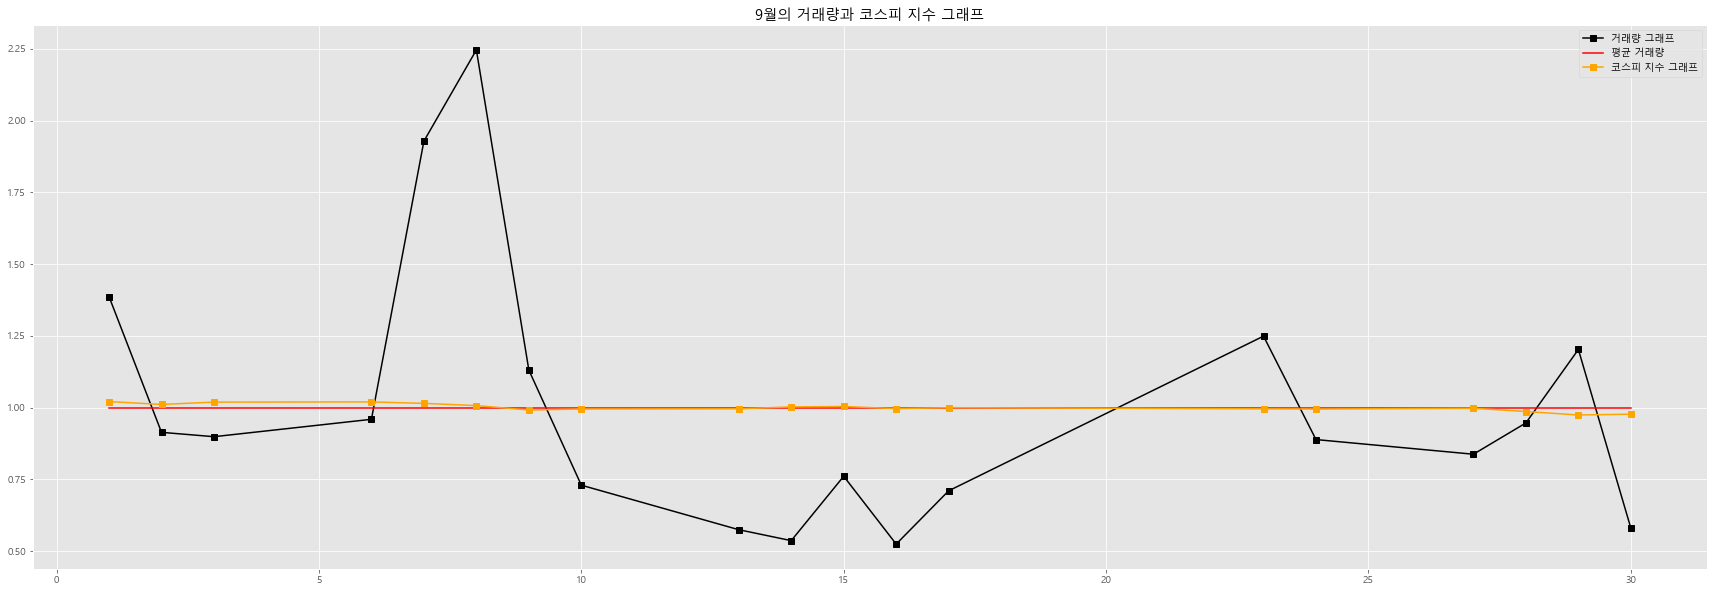

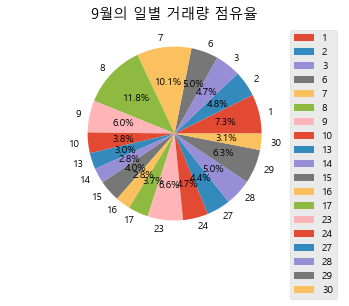

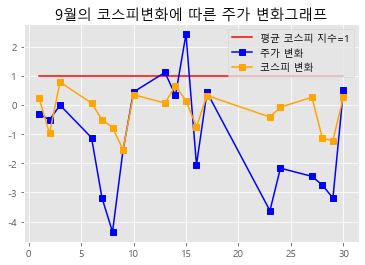

10월의 데이터


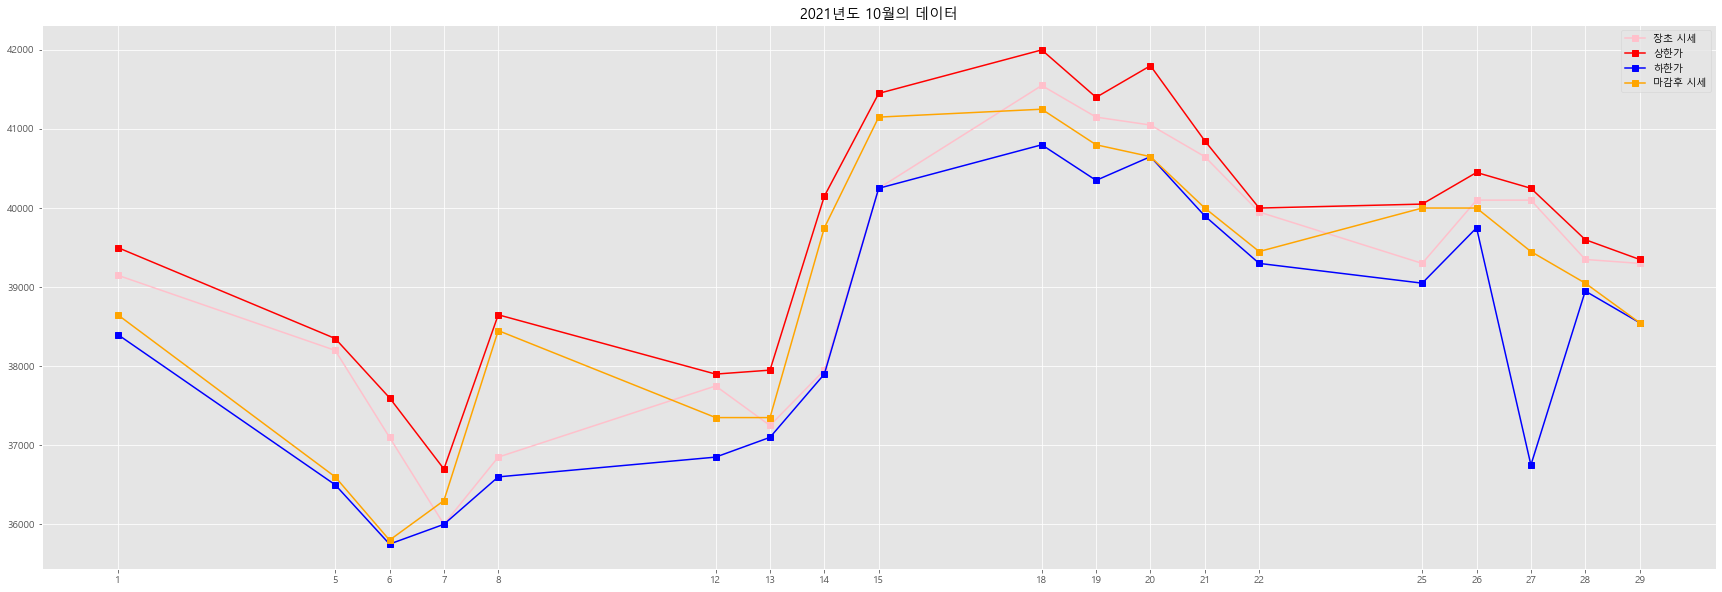

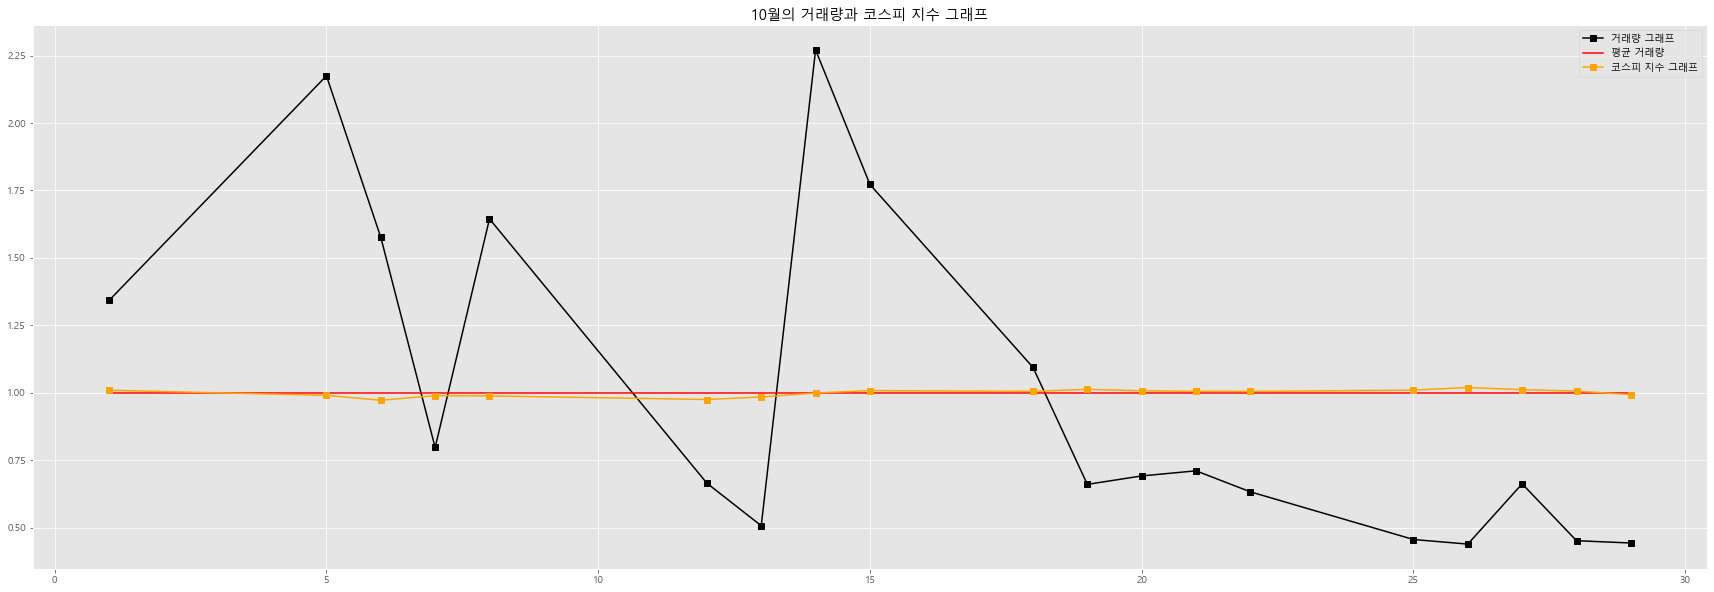

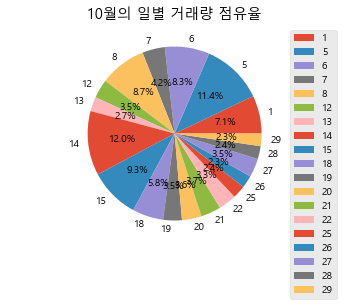

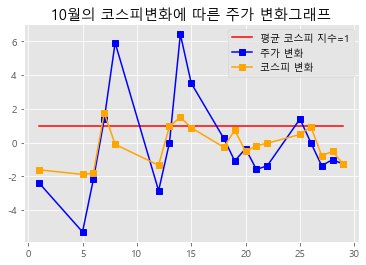

11월의 데이터


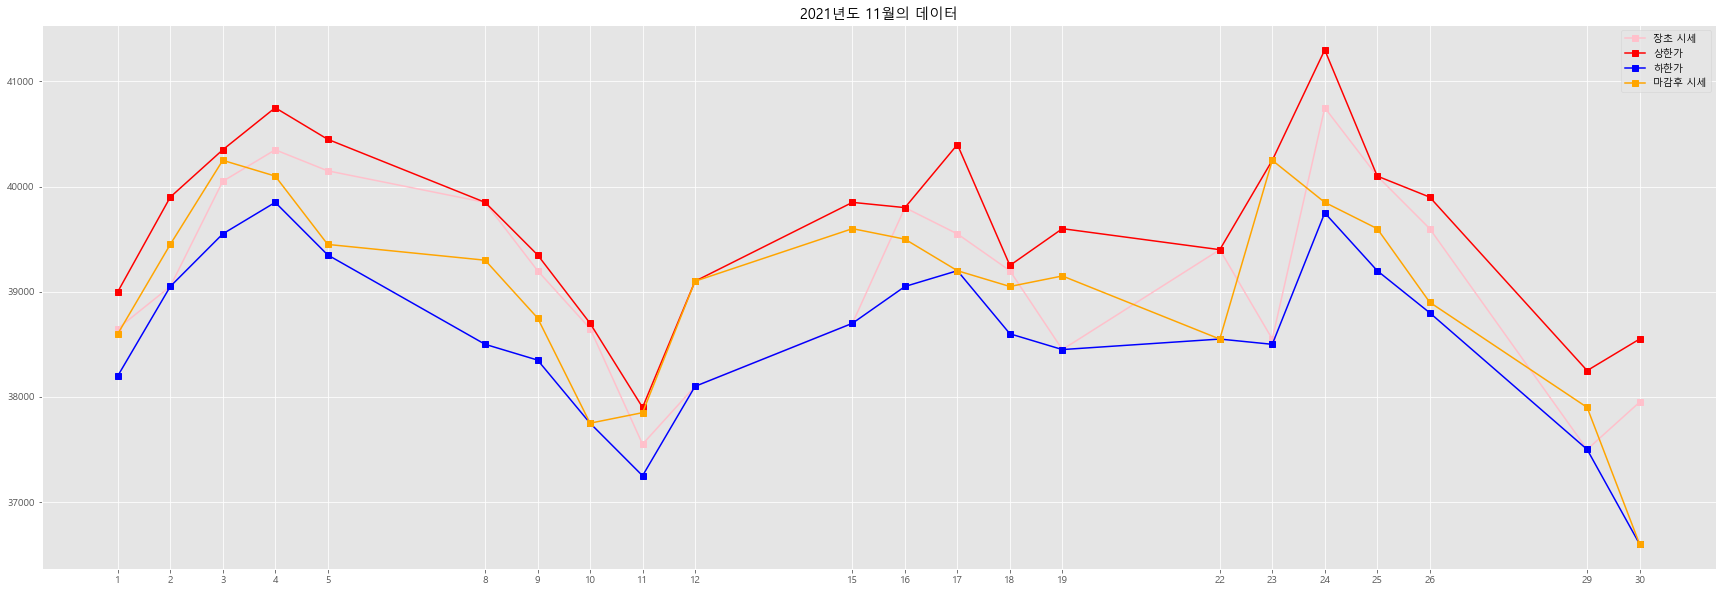

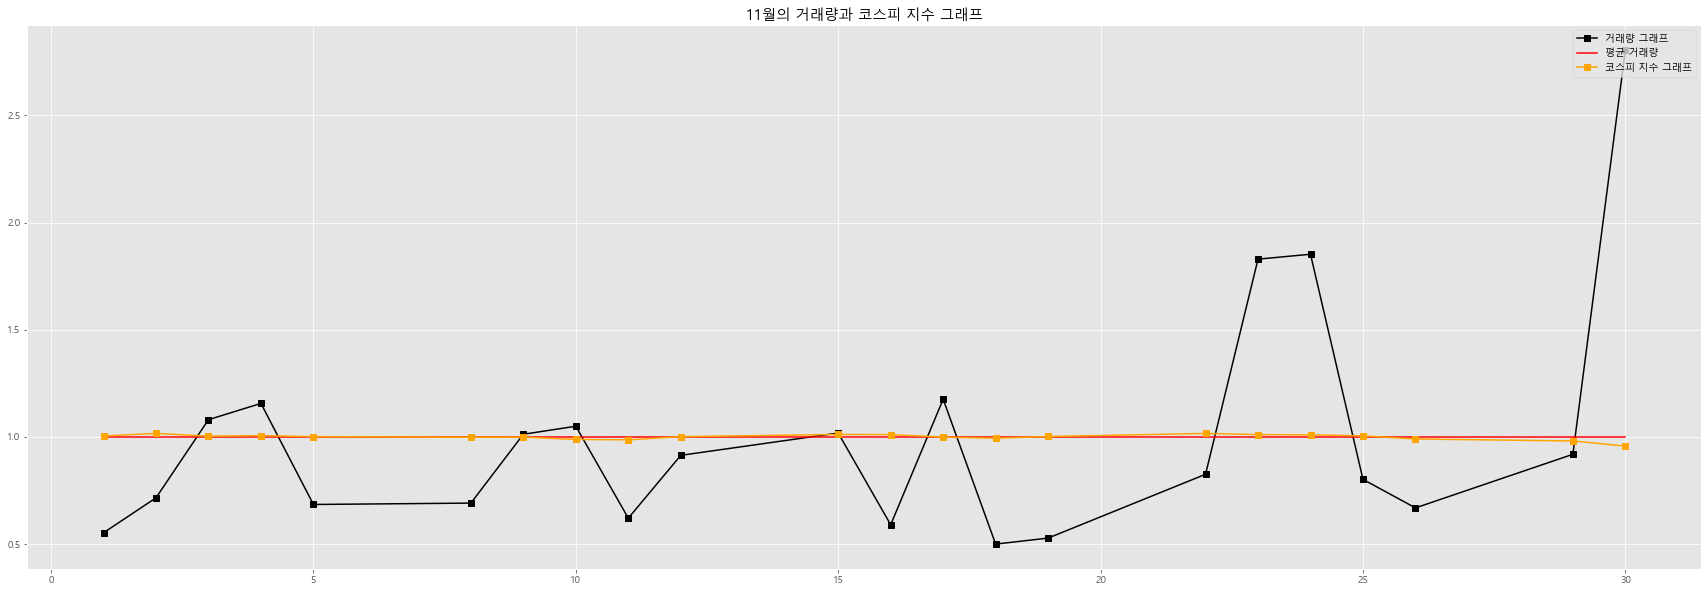

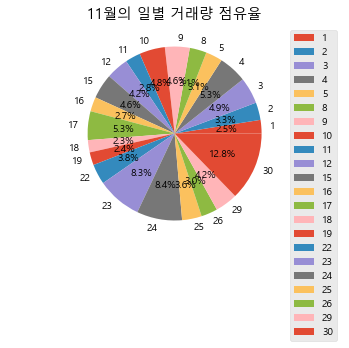

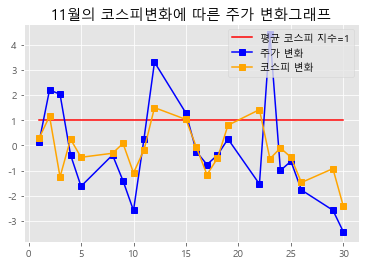

12월의 데이터


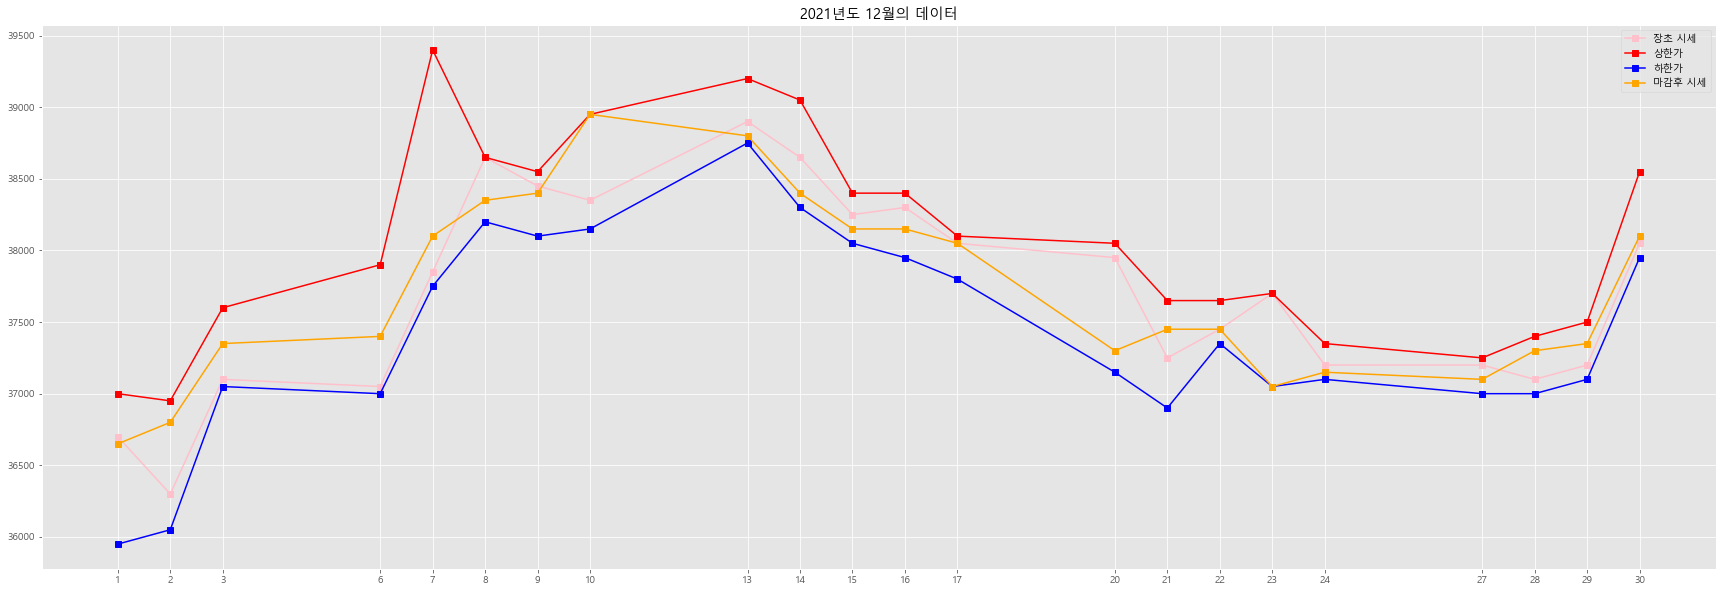

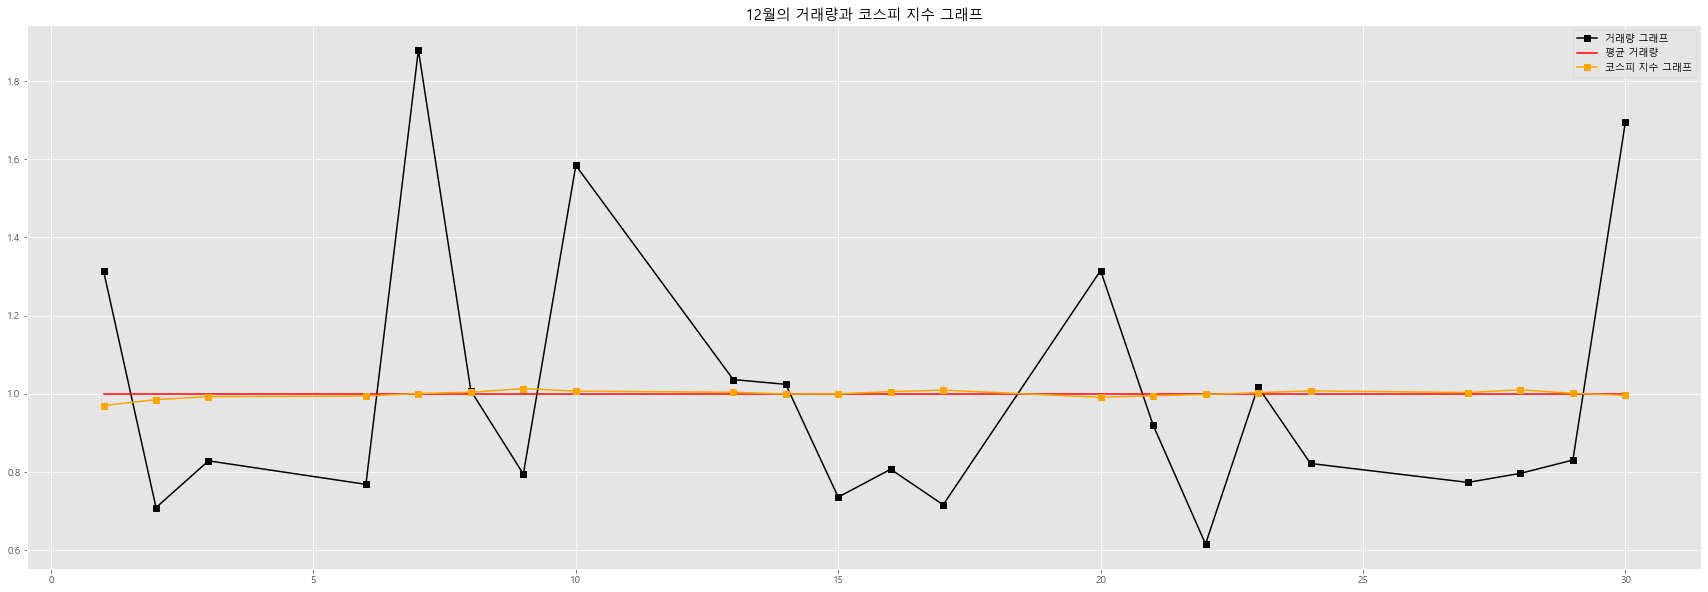

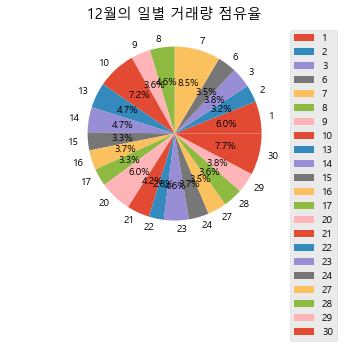

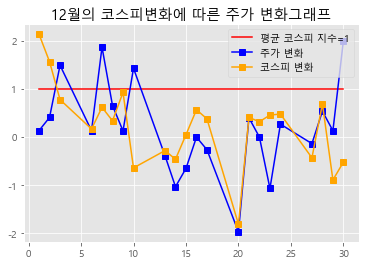

1월의 데이터


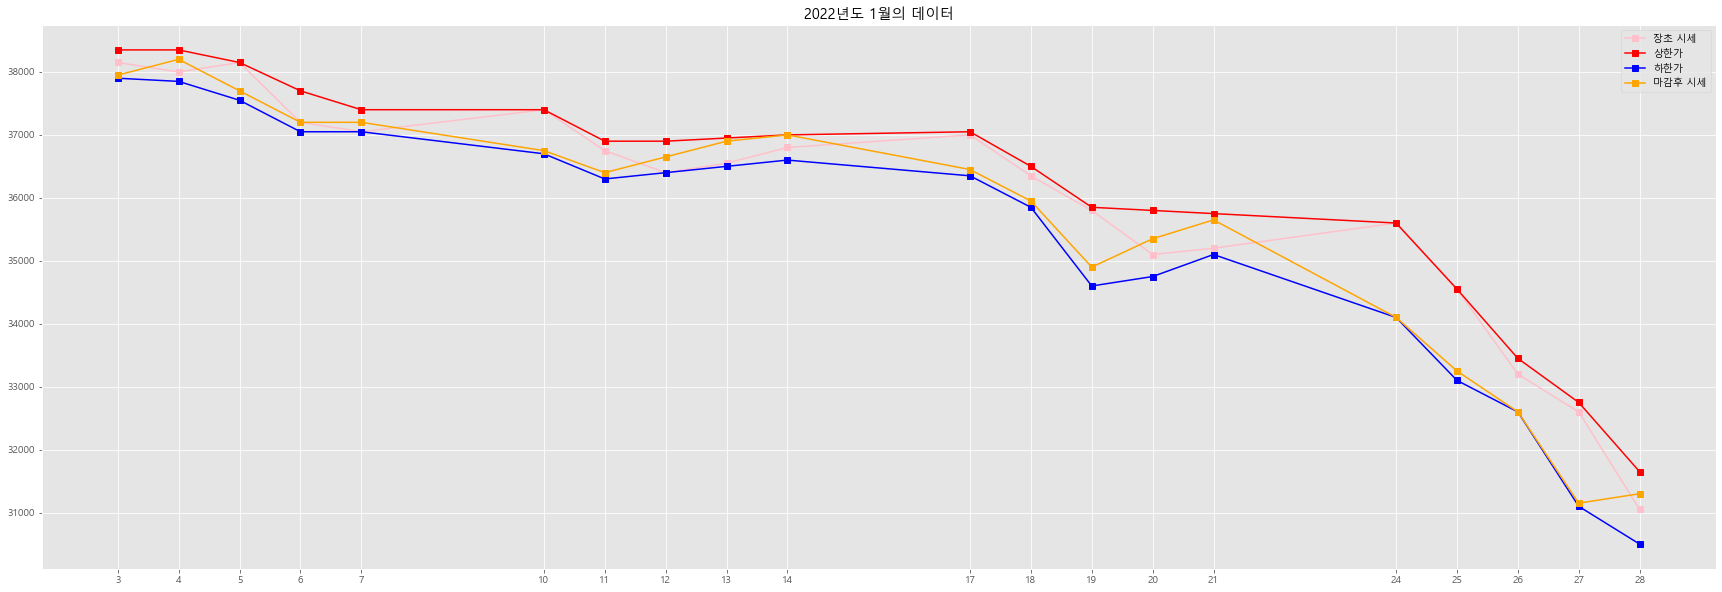

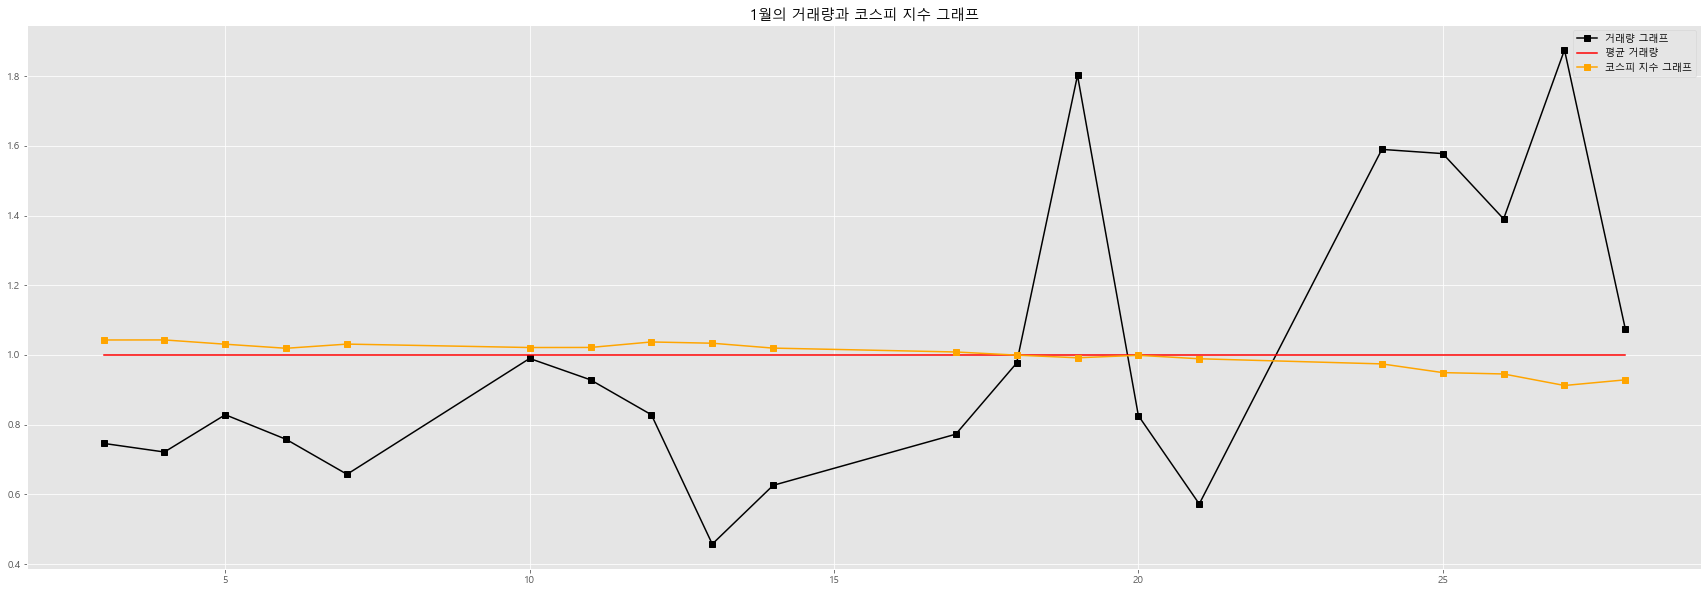

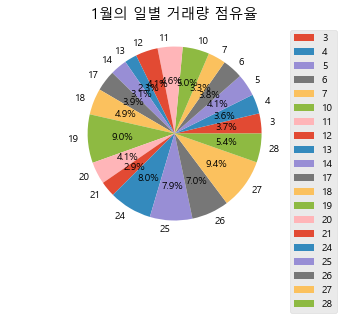

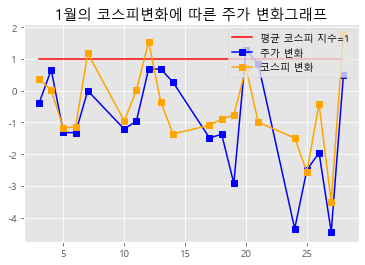

In [ ]:
Symbol_name=input("찾으실 주식의 이름을 넣어주세요")
Symbol_code= 0
Symbol_code= (df_krx[df_krx['Name']== Symbol_name]['Symbol'].values)
print("해당 주식의 코드는{0}입니다.".format(Symbol_code))
df= fdr.DataReader(Symbol_code[0])
start_year=0
start_month=0
start_day=0
end_year=0
start_year=int(str(df.index[0])[:4])  #start_year = str(df.index[0]) 인것을 다시 start_year = int(start_year[:4]) 한것을 줄였음.
end_year=int(str(df.index[-1])[:4])
set_year = str(df.index[0])[:4]
set_month = str(df.index[0])[5:7]
set_day = str(df.index[0])[8:10]
search_info=str(set_year)+"-"+str(set_month)+"-"+str(set_day)
start_month=0
end_month=0
month_volume_avg = 0
month_stocklist= []
day_index = []# ?
day_open = []
day_high = []
day_low = []
day_close= [] 
day_volume= []
print(start_year)
print(end_year)
print("종목코드가 {0}인 주식이름 {1}의 주식데이터가 {2}에서 {3}까지 존재합니다.\n".format(Symbol_code[0],Symbol_name,start_year,end_year))
print("해당 종목의 {0}년도부터 {1}년도까지의 장마감후시세를 그래프로 나타냅니다.\n".format(start_year,end_year))
df['Date'] = df.index
df['Dayofweek'] = df.Date.dt.dayofweek #요일을 숫자로 나타냄. 0~4 월~금.  DayofWeek는 Date에 저장된 값을 참조하므로 DayofWeek변경시 Date의 타입도 변경됨.
#df[(df['Dayofweek'] == 2)] = '수요일'     해당 DayofWeek를 건드리면 Date 칼럼이 Datetime이 Object로 변경되는것을 보아 참조된것의 값도 변함.
#for i in range(0, (end_year-start_year)+1):
#    print(df[df['Date'].dt.year == (start_year+i)])
#각 년도별 데이터 찍을수 있음.
df_stock=fdr.DataReader('KS11','{0}'.format(search_info)) #코스피지수를 가져오는 새로운 df_stock 데이터 프레임을 선언.
df_stock['Date'] = df_stock.index  # df_stcok 데이터프레임에 Date컬럼을 index값을 가지는 컬럼으로 만들어줌.
for i in range(0, (end_year - start_year)+1):
    start_month=0
    end_month=0
    start_month = int(df[df['Date'].dt.year == (start_year+i)]['Date'].dt.month[0]) #각 년도에 시작 달과 끝나는 달이 다를것임
    end_month = int(df[df['Date'].dt.year == (start_year+i)]['Date'].dt.month[-1]) #각녀도별 데이터가 1~12월에 해당하는 데이터가 빌 경우도 있을것임.
    df_year= df[df['Date'].dt.year == (start_year+i)]
    df_year_stock=df_stock[df_stock['Date'].dt.year == (start_year+i)]
    for j in range(0, (end_month - start_month)+1):
        day_index = []
        day_open = []
        day_high = []
        day_low = []
        day_close= [] 
        day_volume= []
        day_volume_avg=0
        day_v_k= []
        day_stocklist= []
        print("{0}월의 데이터".format(start_month+j))
        day_index= list(df_year[df_year['Date'].dt.month == (start_month+j)]['Date'].dt.day)
        day_open = list(df_year[df_year['Date'].dt.month == (start_month+j)]['Open'])
        day_high = list(df_year[df_year['Date'].dt.month == (start_month+j)]['High'])
        day_low = list(df_year[df_year['Date'].dt.month == (start_month+j)]['Low'])
        day_close = list(df_year[df_year['Date'].dt.month == (start_month+j)]['Close'])
        day_volume = list(df_year[df_year['Date'].dt.month == (start_month+j)]['Volume']) #파이로 점유율 체크
        day_volume_avg = df_year[df_year['Date'].dt.month == (start_month+j)]['Volume'].mean() # 각 한달의 볼륨 평균값
        day_volume_per = list(df_year[df_year['Date'].dt.month == (start_month+j)]['Volume']/day_volume_avg) #볼륨의 양을 표현하기 위해
        day_volume_stand= list(np.ones(len(day_volume)))
        day_change= list(df_year[df_year['Date'].dt.month == (start_month+j)]['Change']*100)
        day_stock_change= list(df_year_stock[df_year_stock['Date'].dt.month == (start_month+j)]['Change']*100)
        day_stock_avg= df_year_stock[df_year_stock['Date'].dt.month == (start_month+j)]['Close'].mean()
        day_stock_per = list((df_year_stock[df_year_stock['Date'].dt.month == (start_month+j)]['Close']/day_stock_avg))
        day_stocklist = list(df_year_stock[df_year_stock['Date'].dt.month == (start_month+j)]['Close']) # 아직 안쓴거
        fig, axes = plt.subplots(1, 1, figsize=(30, 10), sharex=True, sharey=True) 
        plt.title('{0}년도 {1}월의 데이터'.format((start_year+i),(start_month+j)))
        plt.plot(day_index, day_open,color='pink', marker='s', label='장초 시세')
        plt.plot(day_index,day_high,color='red', marker='s', label='상한가')
        plt.plot(day_index,day_low,color='blue', marker='s', label='하한가')
        plt.plot(day_index,day_close,color='orange', marker='s', label='마감후 시세')
        plt.legend(loc=1)
        plt.xticks(day_index)
        plt.rcParams['axes.unicode_minus']=False
        plt.show()
        
        fig, axes = plt.subplots(1, 1, figsize=(30, 10), sharex=True, sharey=True)
        plt.title('{0}월의 거래량과 코스피 지수 그래프'.format(start_month+j))
        plt.plot(day_index,day_volume_per,color='black', marker='s', label='거래량 그래프')
        plt.plot(day_index,day_volume_stand,color='red', label='평균 거래량')
        plt.plot(day_index,day_stock_per,color='orange', marker='s', label='코스피 지수 그래프') 
        plt.legend(loc=1)
        plt.show()
        
        plt.title('{0}월의 일별 거래량 점유율'.format((start_month+j)))
        plt.axis('equal')
        plt.pie(day_volume, labels=day_index, autopct='%.1f%%')
        plt.legend()
        plt.show()
        
        plt.title('{0}월의 코스피변화에 따른 주가 변화그래프'.format((start_month+j)))
        plt.plot(day_index,day_volume_stand,color='red', label='평균 코스피 지수=1')
        plt.plot(day_index,day_change,color='blue', marker='s', label='주가 변화')
        plt.plot(day_index,day_stock_change,color='orange', marker='s', label='코스피 변화') #오류나는곳. ? 인덱스가 안맞는 부분이 있음.
        plt.legend(loc=1)
        plt.show()

년에 해당하는 월별 분석

현재 데이터는 2021-08-19에서 부터 시작합니다.
분석을 시작할 년도를 선택해 주세요.2021
2021년의 데이터


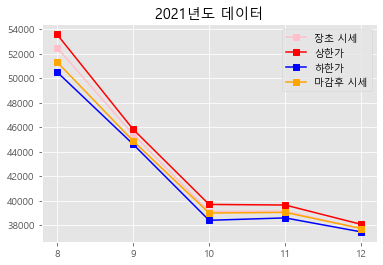

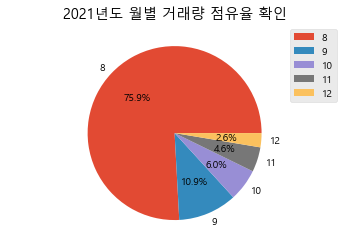

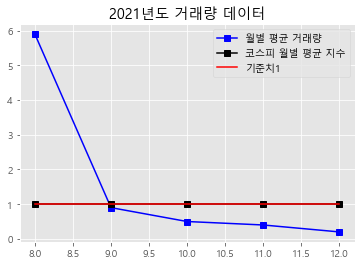

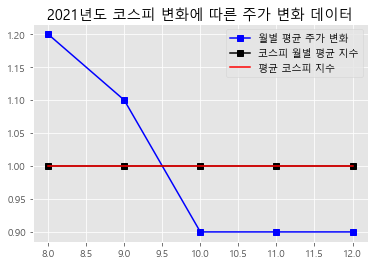

In [ ]:
### month_list = [] #미구현
month_open = [] #미구현
month_high = [] #미구현
month_low = [] #미구현
month_close= [] #미구현
month_volume = [] #미구현
month_volume_avg = 0
print("현재 데이터는 {0}에서 부터 시작합니다.".format(search_info))
start_year= int(input("분석을 시작할 년도를 선택해 주세요."))
end_year=start_year
for x in range(0, (end_year - start_year)+1):
    month_list = [] #초기화
    month_open = []
    month_high = []
    month_low = []
    month_close= []
    month_change=[0]
    month_volume = []
    month_stock_change = []
    month_volume_per=[]
    month_stock_per=[]
    month_stand=[]
    month_avg_flow= []
    start_month = int(df[df['Date'].dt.year == (start_year+x)]['Date'].dt.month[0]) #각 년도에 시작 달과 끝나는 달이 다를것임
    end_month = int(df[df['Date'].dt.year == (start_year+x)]['Date'].dt.month[-1]) #각녀도별 데이터가 1~12월에 해당하는 데이터가 빌 경우도 있을것임.
    df_year= df[df['Date'].dt.year == (start_year+x)]
    df_year_stock=df_stock[df_stock['Date'].dt.year == (start_year+x)]
    print("{0}년의 데이터".format(start_year+x))
    month_volume_avg= round(df_year['Volume'].mean(),1) #총 1년치 거래량 평균.
    month_close_avg=round(df_year['Close'].mean(),1) #총 1년치 주가 평균
    month_stock_avg=round(df_year_stock['Close'].mean(),1)
    for i in range(0, (end_month - start_month)+1):
        month_list.append(start_month+i)
        month_open.append(round(df_year[df_year['Date'].dt.month == (start_month+i)]['Open'].mean(),1))
        month_high.append(round(df_year[df_year['Date'].dt.month == (start_month+i)]['High'].mean(),1))
        month_low.append(round(df_year[df_year['Date'].dt.month == (start_month+i)]['Low'].mean(),1))
        month_close.append(round(df_year[df_year['Date'].dt.month == (start_month+i)]['Close'].mean(),1))
        month_volume.append(round(df_year[df_year['Date'].dt.month == (start_month+i)]['Volume'].mean(),1))
        if month_volume_avg != 0:
            month_volume_per.append(round((df_year[df_year['Date'].dt.month == (start_month+i)]['Volume'].mean())/month_volume_avg,1))
        elif month_volume_avg == 0:
            month_volume_per.append(0)
        month_stock_per.append(round(df_year_stock[df_year_stock['Date'].dt.month == (start_month+i)]['Close'].mean()/month_stock_avg,1))
        month_stand.append(1)
        if(i >= 1):
            month_change.append(round( (month_close[i]-month_close[i-1])/month_close[i] , 2) )
        month_stock_change.append(round(df_year_stock[df_year_stock['Date'].dt.month == (start_month+i)]['Close'].mean(),1))
        month_avg_flow.append(round(df_year[df_year['Date'].dt.month == (start_month+i)]['Close'].mean()/month_close_avg,1))
        
    plt.title('{0}년도 데이터'.format((start_year+x)))
    plt.plot(month_list, month_open,color='pink', marker='s', label='장초 시세')
    plt.plot(month_list,month_high,color='red', marker='s', label='상한가')
    plt.plot(month_list,month_low,color='blue', marker='s', label='하한가')
    plt.plot(month_list,month_close,color='orange', marker='s', label='마감후 시세')
    plt.legend(loc=1)
    plt.xticks(month_list)
    plt.rcParams['axes.unicode_minus']=False
    plt.show()
    
    plt.title('{0}년도 월별 거래량 점유율 확인'.format((start_year+x)))
    plt.axis('equal')
    plt.pie(month_volume, labels=month_list, autopct='%.1f%%')
    plt.legend()
    plt.show()
    
    plt.title('{0}년도 거래량 데이터'.format((start_year+x)))
    plt.plot(month_list, month_volume_per,color='blue', marker='s', label='월별 평균 거래량')
    plt.plot(month_list,month_stock_per,color='black', marker='s', label='코스피 월별 평균 지수')
    plt.plot(month_list,month_stand,color='red', label='기준치1')    
    plt.legend(loc=1)
    plt.show()
    
    plt.title('{0}년도 코스피 변화에 따른 주가 변화 데이터'.format((start_year+x)))
    plt.plot(month_list, month_avg_flow,color='blue', marker='s', label='월별 평균 주가 변화')
    plt.plot(month_list,month_stock_per,color='black', marker='s', label='코스피 월별 평균 지수')
    plt.plot(month_list,month_stand,color='red', label='평균 코스피 지수') 
    plt.legend(loc=1)
    plt.show()
#month_change, month_stock_change,_month_stock_per,month_stocklist는 표현하기가 어려워보임. 일단 

* 코로나 관련 주 를 살펴보며

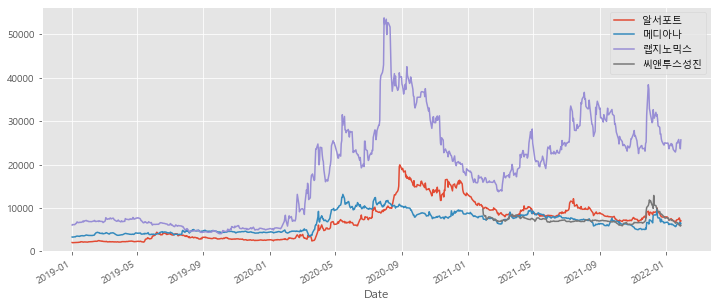

In [ ]:
# ntimes=4 #int(input('몇개의 그래프'))
plt.figure(figsize=(12,5))
plt.rc('font',family='Malgun Gothic')

ntimes=['알서포트','메디아나','랩지노믹스','씨앤투스성진']
for i in ntimes:
# for i in range(ntimes):
#     Symbol_name=input("찾으실 주식의 이름을 넣어주세요")
    Symbol_name=i
    Symbol_code= 0
    Symbol_code= (df_krx[df_krx['Name']== Symbol_name]['Symbol'].values)
    df= fdr.DataReader(Symbol_code[0],'2019')['Close']
    df.plot(label=Symbol_name)
    
    
plt.ylim(0)
plt.legend()
plt.show()

알서포트 - 원격화상회의 / 메디아나 - 인공호흡기 의료 관련

랩지노믹스 - 코로나 진단 키트 / 씨앤투스성진 - 마스크 제조

* 산업(Sector)으로 재설정

 - 개발 관련 산업?
 - '소프트웨어 개발 및 공급업'

In [ ]:
# 몇개의 주식이 있을까?

Software_df=df_krx[df_krx['Sector']=='소프트웨어 개발 및 공급업']  #섹터 입력 
Software_count=Software_df['Symbol'].count()    #
print(int(Software_count),end='')
print(' 개의 주식이 있습니다.')

# print(Software_df)

152 개의 주식이 있습니다.


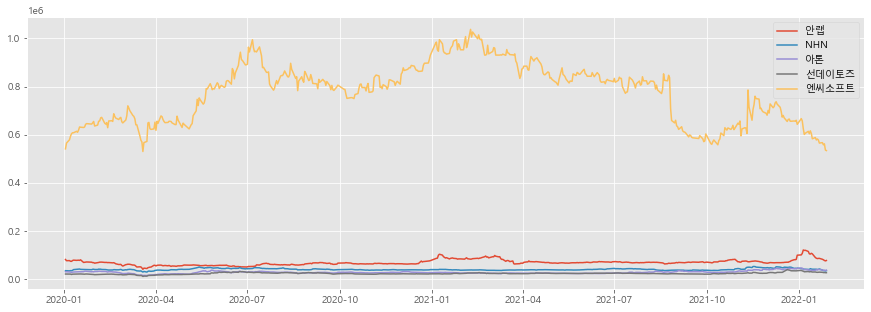

In [ ]:
# 152개 중에서 일부를 선정하여 그려냄

plt.figure(figsize=(15,5))

ilboo=['안랩','NHN','아톤','선데이토즈','엔씨소프트']
# Software_Symbol=Software_df[Software_df['Name']==ilboo[0]]['Symbol'].values[0]
# print(type(str(Software_Symbol)))
# print(Software_Symbol)
for i in ilboo: 
    Software_Symbol=Software_df[Software_df['Name']==i]['Symbol'].values[0]
    fdr_Software=fdr.DataReader(Software_Symbol,'2020')
    ilboo_name=Software_df[Software_df['Name']==i]['Name'].values[0]
    plt.plot(fdr_Software['Close'],label=ilboo_name)
    
plt.legend()
plt.show()

* 상승, 하락을 잘 살펴보기 위해 보정 (데이터 / 데이터의 평균)

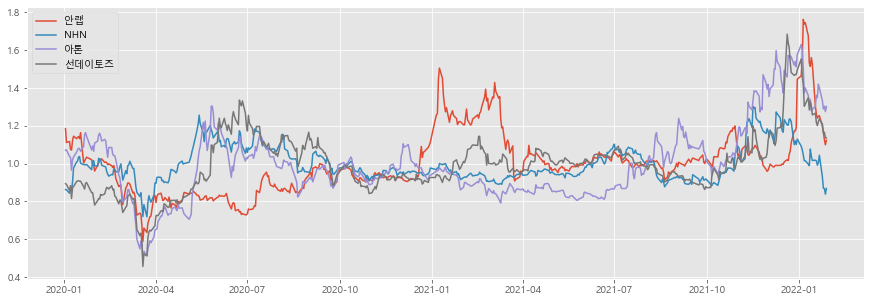

In [ ]:
plt.figure(figsize=(15,5))

ilboo=['안랩','NHN','아톤','선데이토즈']
# Software_Symbol=Software_df[Software_df['Name']==ilboo[0]]['Symbol'].values[0]
# print(type(str(Software_Symbol)))
# print(Software_Symbol)
for i in ilboo: 
    Software_Symbol=Software_df[Software_df['Name']==i]['Symbol'].values[0]
    fdr_Software=fdr.DataReader(Software_Symbol,'2020')
    ilboo_name=Software_df[Software_df['Name']==i]['Name'].values[0]
    plt.plot(fdr_Software['Close']/fdr_Software['Close'].mean(),label=ilboo_name)
    
plt.legend()
plt.show()

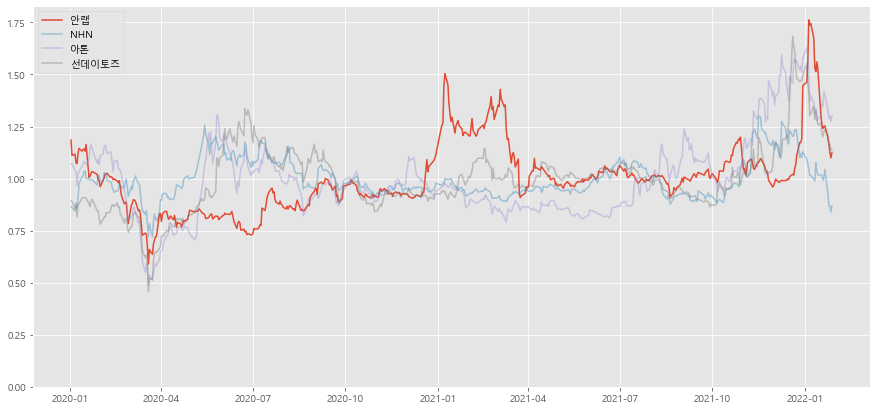

In [ ]:
plt.figure(figsize=(15,7))

ilboo=['NHN','아톤','선데이토즈']

Symbol_name= '안랩' #input("찾으실 주식의 이름을 넣어주세요")
Symbol_code= 0
Symbol_code= (df_krx[df_krx['Name']== Symbol_name]['Symbol'].values)

df= fdr.DataReader(Symbol_code[0], '2020')
df['Date']=df.index
df2=df['Close']
plt.plot(df2/df2.mean(),label=Symbol_name)

for i in ilboo:
    Symbol_name= i #input("찾으실 주식의 이름을 넣어주세요")
    Symbol_code= 0
    Symbol_code= (df_krx[df_krx['Name']== Symbol_name]['Symbol'].values)
    df= fdr.DataReader(Symbol_code[0], '2020')
    df['Date']=df.index
    df2=df['Close']
    plt.plot(df2/df2.mean(),label=Symbol_name, alpha=0.4)

    
plt.ylim(0)
plt.legend()
plt.show()



* 유독 튀는 '안랩' 주식, 혹시 안후보와 관련되어있나?

In [ ]:
hnewsdata=pd.read_csv('hotnews.csv',encoding='cp949')
chulsoohyung=hnewsdata[hnewsdata['Unnamed: 0']=='안철수']

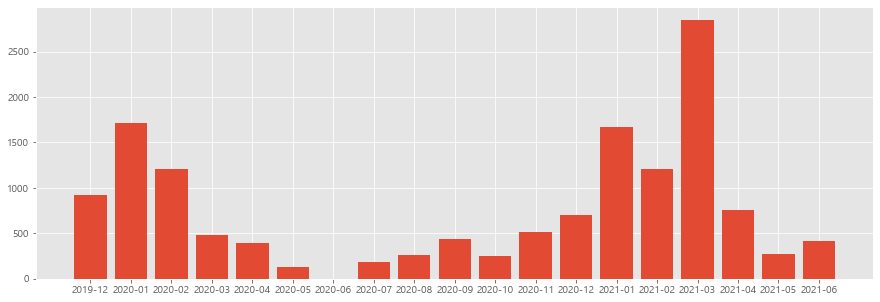

In [ ]:
# 안철수 뉴스 언급량

x_bar=[]
y_bar=[]
plt.figure(figsize=(15,5))
for i in range(27,46):
    x_bar.append(hnewsdata.columns[i])
    y_bar.append(int(chulsoohyung[hnewsdata.columns[i]].values))

for i in range(len(x_bar)):
    x_bar[i]=x_bar[i][:7]

plt.bar(x_bar,y_bar)
plt.show()

* 언급량이 유독 많은 2021년 1월~3월 구간, 긍정적 여론? 부정적 여론?

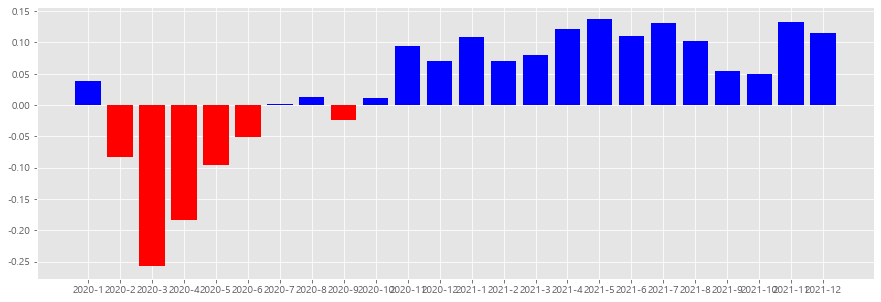

In [ ]:
nsi_data=pd.read_csv('NSI.csv',encoding='cp949')
nsi_group=nsi_data.groupby(['year','month']).mean()
# print(nsi_group)
# print(type(nsi_group))
# print(nsi_group['NSI'].mean()) # 2005~현재 긍정/부정 평균
# print()

start_year=2020

nsi_group_mean=[]
nsi_group_month=[]
for i in range(start_year,start_year+2):
    for j in range(1,13):
        nsi_group_1=nsi_data[nsi_data['year']==i]
        nsi_group_2=nsi_group_1[nsi_group_1['month']==j]
        nsi_group_mean.append(nsi_group_2['NSI'].mean())
        
        nsi_group_month.append('{0}-{1}'.format(i,j))

nsi_group_jisoo=(np.array(nsi_group_mean)/nsi_group['NSI'].mean())-1

nsi_group_color=[]
for i in range(len(nsi_group_month)):
    if nsi_group_jisoo[i] >= 0:
        nsi_group_color.append('b')
    else:
        nsi_group_color.append('r')


# print(nsi_group_jisoo)
# print(nsi_group_month)

plt.figure(figsize=(15,5))
plt.bar(nsi_group_month,nsi_group_jisoo,color=nsi_group_color)
plt.show()

* 긍정/부정지수 X 언급량 = 긍정적 여론 or 부정적 여론
  - ..